In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Visualización completa de los DataFrames

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.width', 400)

## Ejercicio 1
Imprime por pantalla tu nombre, apellido y email

In [3]:
# Resuelve en esta celda el ejercicio 1

datos_personales = "Nombre completo: Paula Martínez Cantero\nEmail: paula.mtnezcantero@gmail.com"
print(datos_personales)

Nombre completo: Paula Martínez Cantero
Email: paula.mtnezcantero@gmail.com


## Ejercicio 2

### Ejercicio 2.1
Muestra los primeros registros del siguiente conjunto de datos

In [4]:
# Cargar el dataset "titanic" de seaborn
df_dos = sns.load_dataset("titanic")

# Resolver aqui el ejercicio 2.1
df_dos.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Ejercicio 2.2
Muestra una descripción general del conjunto de datos cargado en el ejercicio 2.1

In [5]:
# Resuelve aqui el ejercicio 2.2

print("Información general del dataset:")
df_dos.info()

print("\n")
print("-----------------------------------------------------------------------")
print("\n")

print("Resumen estadístico de las columnas con datos de tipo numérico:")
print(df_dos.describe())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


--------------------------------------------

### Ejercicio 2.3
Elimina los datos de la columna "deck" y sustituye los datos nulos para la columna "age" con el valor medio. Luego muestra el dataframe:

In [6]:
# Resuelve aqui el ejercicio 2.3 --> df_dos <--

copia_df_dos = df_dos.copy()

# Eliminar columna "deck"

copia_df_dos.drop(["deck"], axis=1, inplace=True)

# Imputación de nulos con la media en la columna "age"

copia_df_dos["age"] = copia_df_dos["age"].fillna(copia_df_dos["age"].mean())

# Comprobación del resultado seleccionando una muestra aleatoria de filas

copia_df_dos.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
89,0,3,male,24.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
873,0,3,male,47.000000,0,0,9.0000,S,Third,man,True,Southampton,no,True
304,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
727,1,3,female,29.699118,0,0,7.7375,Q,Third,woman,False,Queenstown,yes,True
466,0,2,male,29.699118,0,0,0.0000,S,Second,man,True,Southampton,no,True
610,0,3,female,39.000000,1,5,31.2750,S,Third,woman,False,Southampton,no,False
429,1,3,male,32.000000,0,0,8.0500,S,Third,man,True,Southampton,yes,True
604,1,1,male,35.000000,0,0,26.5500,C,First,man,True,Cherbourg,yes,True
647,1,1,male,56.000000,0,0,35.5000,C,First,man,True,Cherbourg,yes,True
847,0,3,male,35.000000,0,0,7.8958,C,Third,man,True,Cherbourg,no,True


#### Ejercicio 2.4
Crea un gráfico de tipo histograma que represente la distribución de las edades de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

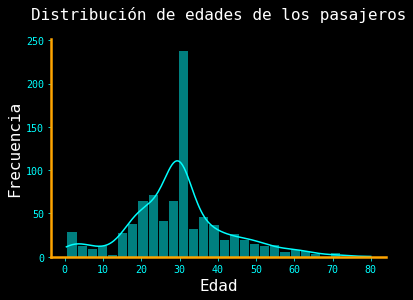

In [7]:
# Resuelve aqui el ejercicio 2.4. Resuelto con Seaborn

plt.rcParams['font.family'] = 'DejaVu Sans Mono'
mar_palette = ["cyan", "lightseagreen", "cadetblue", "steelblue", "cyan"]
sns.set_palette(mar_palette)


fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')


sns.histplot(data=copia_df_dos, x="age", bins=30, kde=True, ax=ax)


ax.set_xlabel("Edad", fontsize=16, color='white')
ax.set_ylabel("Frecuencia", fontsize=16, color='white')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('orange')
ax.spines['bottom'].set_color('orange')


ax.tick_params(axis='x', colors='cyan')
ax.tick_params(axis='y', colors='cyan')


ax.set_title('Distribución de edades de los pasajeros', fontsize=16, color='white', pad=20)


plt.show()


#### Ejercicio 2.5
Crea un gráfico circular que represente la distribución por género de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

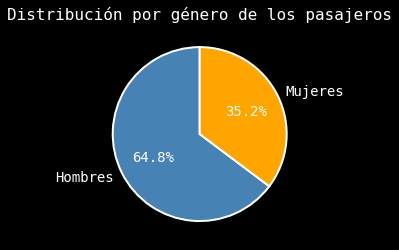

In [8]:
# Resuelve aqui el ejercicio 2.5. Resuelto con Matplotlib

genero_counts = copia_df_dos["sex"].value_counts()

etiquetas = ["Hombres", "Mujeres"]

colors = ["steelblue", "orange"]

plt.rcParams['font.family'] = 'DejaVu Sans Mono'
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.pie(
    genero_counts, 
    labels=etiquetas, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=colors,
    textprops={'color': 'white', 'fontsize': 14},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

ax.set_title("Distribución por género de los pasajeros", color='white', fontsize=16)

plt.show()

## Ejercicio 3

#### Ejercicio 3.1
Separa el dataset en dos variables, 'x' e 'y'.
 - La variable 'x' debe incluir las columnas 'depth', 'table', 'price', 'x', 'y' y 'z'.
 - La variable 'y' debe incluir la columna 'carat'.

In [12]:
# Carga el dataset "diamonds" de seaborn
diamantes = sns.load_dataset("diamonds")
diamantes.head()

# Resuelve aqui el ejercicio 3.1

tres_x = diamantes[["depth", "table", "price", "x", "y", "z"]]
tres_y = diamantes["carat"]

print("Comprobación de las columnas en la variable 'x':\n")
print(tres_x.head())
print("--------------------------------------------------\n")
print("Comprobación de las columnas en la variable 'y':\n")
print(tres_y.head())

Comprobación de las columnas en la variable 'x':

   depth  table  price     x     y     z
0   61.5   55.0    326  3.95  3.98  2.43
1   59.8   61.0    326  3.89  3.84  2.31
2   56.9   65.0    327  4.05  4.07  2.31
3   62.4   58.0    334  4.20  4.23  2.63
4   63.3   58.0    335  4.34  4.35  2.75
--------------------------------------------------

Comprobación de las columnas en la variable 'y':

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64


#### Ejercicio 3.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [13]:
# Resuelve aqui el ejercicio 3.2

tres_x_train, tres_x_test, tres_y_train, tres_y_test = train_test_split(tres_x, tres_y, test_size=0.4, random_state=42)

# Comprobación del tamaño del conjunto de la variable "x"

print(f"Tamaño del conjunto de entrenamiento (x_train): {tres_x_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba (x_test): {tres_x_test.shape[0]} filas")
print("------------------------------------------------------------")

# Comprobación del tamaño del conjunto de la variable "y"

print(f"Tamaño del conjunto de entrenamiento (y_train): {tres_y_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba (y_test): {tres_y_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento (x_train): 32364 filas
Tamaño del conjunto de prueba (x_test): 21576 filas
------------------------------------------------------------
Tamaño del conjunto de entrenamiento (y_train): 32364 filas
Tamaño del conjunto de prueba (y_test): 21576 filas


#### Ejercicio 3.3
Crea un modelo de regresión lineal y entrenalo con los conjuntos de datos separados en el ejercicio anterior. La variable objetivo corresponde a la columna 'carat'

In [30]:
# Resuelve aqui el ejercicio 3.3

# Crear y entrenar el modelo con los datos de entrenamiento (variables predictoras y variable objetivo.)

tres_lrm = LinearRegression()
tres_lrm.fit(tres_x_train, tres_y_train)

# Mostrar coeficientes y la intersección (cuánto influye cada variable en la predicción (coeficientes) y el valor base del modelo cuando todas las variables son cero (intersección))

print(f"Coeficientes del modelo:\n{tres_lrm.coef_}")
print("------------------------------------------------------------")
print(f"Intersección (término independiente):\n{tres_lrm.intercept_}")

Coeficientes del modelo:
[1.83553628e-02 4.37885137e-03 3.24803939e-05 3.00417037e-01
 8.60095293e-03 7.48562691e-04]
------------------------------------------------------------
Intersección (término independiente):
-2.4886874780396724


#### Ejercicio 3.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la columna 'carat'

Primeras predicciones del valor 'carat':

[0.14346117 0.61704432 0.40518998 0.44160874 1.4217783  0.94867185
 0.53445283 0.54929319 0.66590887 1.12510883]


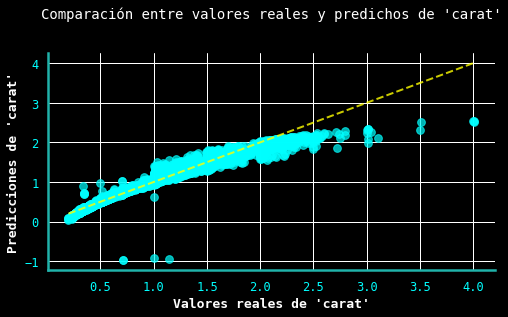

In [33]:
# Resuelve aqui el ejercicio 3.3

predicciones_tres = tres_lrm.predict(tres_x_test)

print("Primeras predicciones del valor 'carat':\n")
print(predicciones_tres[:10])

# Gráfico de dispersión de predicciones vs. valores reales para evaluar visualmente la precisión del modelo

sns.set(style="darkgrid")
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('black')

scatter = ax.scatter(
    tres_y_test,
    predicciones_tres,
    c='cyan',
    edgecolor='aqua',
    alpha=0.7,
    s=60
)

ax.plot([tres_y_test.min(), tres_y_test.max()], [tres_y_test.min(), tres_y_test.max()],
        color='yellow', lw=2, linestyle='--', alpha=0.8)

ax.set_xlabel("Valores reales de 'carat'", fontsize=13, color='white', weight='bold')
ax.set_ylabel("Predicciones de 'carat'", fontsize=13, color='white', weight='bold')

ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')

ax.tick_params(axis='x', colors='cyan', labelsize=12)
ax.tick_params(axis='y', colors='cyan', labelsize=12)

plt.title("Comparación entre valores reales y predichos de 'carat'", fontsize=14, color='white', pad=35)

plt.show()

### Ejercicio 4

#### Ejercicio 4.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [34]:
data = load_breast_cancer()
cuatro_x = pd.DataFrame(data.data, columns=data.feature_names)
cuatro_y = pd.Series(data.target)

# ALTERNATIVA CON OTRO DATASET 
# Cargar el dataset "titanic" de seaborn
# df = sns.load_dataset("titanic")

# Resuelve aqui el ejercicio 4.1

# Comprobación del tipo de dato de las columnas de las variables "x" e "y"
print(f"El tipo de dato de las columnas de la variable 'x' son:\n{cuatro_x.dtypes}")
print("--------------------------------------------------\n")
print(f"El tipo de dato de las columnas de la variable 'y' son:\n{cuatro_y.dtypes}")
print("--------------------------------------------------\n")

# Resumen estadístico de los datos numéricos del dataset 

print(f"Resumen estadístico de los datos numéricos del dataset (Transposición de columnas y filas):\n{cuatro_x.describe().T}")

El tipo de dato de las columnas de la variable 'x' son:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64

#### Ejercicio 4.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [15]:
# Resuelve aqui el ejercicio 4.2

cuatro_x_train, cuatro_x_test, cuatro_y_train, cuatro_y_test = train_test_split(cuatro_x, cuatro_y, test_size=0.4, random_state=42)

# Comprobación del tamaño del conjunto de la variable "x"

print(f"Tamaño del conjunto de entrenamiento (x_train): {cuatro_x_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba (x_test): {cuatro_x_test.shape[0]} filas")
print("------------------------------------------------------------")

# Comprobación del tamaño del conjunto de la variable "y"

print(f"Tamaño del conjunto de entrenamiento (y_train): {cuatro_y_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba (y_test): {cuatro_y_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento (x_train): 341 filas
Tamaño del conjunto de prueba (x_test): 228 filas
------------------------------------------------------------
Tamaño del conjunto de entrenamiento (y_train): 341 filas
Tamaño del conjunto de prueba (y_test): 228 filas


#### Ejercicio 4.3
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [44]:
# Resuelve aqui el ejercicio 4.3

# Crear y entrenar el modelo con los datos de entrenamiento (variables predictoras y variable objetivo.)

cuatro_lrm = LogisticRegression(max_iter=10000)
cuatro_lrm.fit(cuatro_x_train, cuatro_y_train)

# Mostrar resultados básicos de precisión sobre el conjunto de entrenamiento y prueba

print("Modelo de regresión logística entrenado correctamente.")
print("-----------------------------------------------------")
print(f"Precisión en entrenamiento: {cuatro_lrm.score(cuatro_x_train, cuatro_y_train):.4f}")
print(f"Precisión en prueba:{cuatro_lrm.score(cuatro_x_test, cuatro_y_test):.4f}")

Modelo de regresión logística entrenado correctamente.
-----------------------------------------------------
Precisión en entrenamiento: 0.9648
Precisión en prueba:0.9693


#### Ejercicio 4.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

Primeras predicciones de la variable objetivo:

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0]


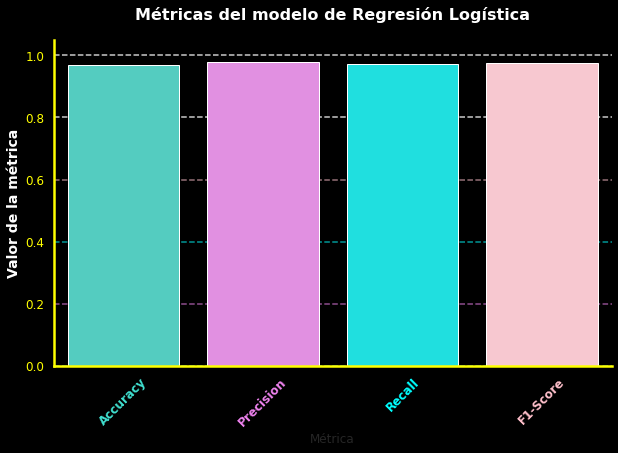

In [54]:
# Resuelve aqui el ejercicio 4.4

predicciones_cuatro = cuatro_lrm.predict(cuatro_x_test)

print("Primeras predicciones de la variable objetivo:\n")
print(predicciones_cuatro[:20])

# Visualización de precisión del modelo: comparación entre predicciones y valores reales

accuracy = accuracy_score(cuatro_y_test, predicciones_cuatro)
precision = precision_score(cuatro_y_test, predicciones_cuatro)
recall = recall_score(cuatro_y_test, predicciones_cuatro)
f1 = f1_score(cuatro_y_test, predicciones_cuatro)

metricas_df = pd.DataFrame({
    "Métrica": ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    "Valor": [accuracy, precision, recall, f1]
})

colores = ['turquoise', 'violet', 'cyan', 'pink']

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

sns.barplot(x="Métrica", y="Valor", data=metricas_df, palette=colores, ax=ax)

plt.ylim(0, 1.05)
plt.xticks(rotation=45)

for i, label in enumerate(ax.get_xticklabels()):
    label.set_color(colores[i % len(colores)])  
    label.set_fontsize(12)
    label.set_weight('bold')

for tick in ax.get_yticklabels():
    tick.set_color('yellow')
    tick.set_fontsize(12)

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('yellow')   
ax.spines['bottom'].set_color('yellow') 

ax.grid(True, axis='y', linestyle='--', linewidth=1.5)
for i, line in enumerate(ax.get_ygridlines()):
    if i < len(colores): 
        line.set_color(colores[i % len(colores)])  
        line.set_alpha(0.6)

plt.ylabel('Valor de la métrica', fontsize=14, color='white', weight='bold')
plt.title('Métricas del modelo de Regresión Logística', fontsize=16, color='white', weight='bold', pad=20)

plt.show()

### Ejercicio 5

#### Ejercicio 5.1
Muestra los primeros registros del siguiente conjunto de datos

In [58]:
df_cinco = sns.load_dataset("penguins")

# Resuelve aqui el ejercicio 5.1

print("Primeros registros del dataset:")

df_cinco.head(10)

Primeros registros del dataset:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


#### Ejercicio 5.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. La variable objetivo corresponde a la columna "species"

In [70]:
# Resuelve aquí el ejericio 5.2

# Eliminar valores nulos de los registros del DataFrame (para poder realizar RandomForest)

df_cinco = sns.load_dataset("penguins").dropna()

# Separación del dataset en dos variables, "x" e "y". La variable objetivo (y) es "species"

cinco_x = df_cinco.drop("species", axis=1)
cinco_y = df_cinco["species"]

# Tranformar columnas categóricas a numéricas (para poder realizar RandomForest)

cinco_x_numericas = pd.get_dummies(cinco_x, drop_first=True)

# Separación del dataset provisto en conjunto de entrenamiento y de test

cinco_x_train, cinco_x_test, cinco_y_train, cinco_y_test = train_test_split(cinco_x_numericas, cinco_y, test_size=0.4, random_state=42)

# Comprobación del tamaño del conjunto de la variable "x"

print(f"Tamaño del conjunto de entrenamiento (x_train): {cinco_x_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba (x_test): {cinco_x_test.shape[0]} filas")
print("------------------------------------------------------------")

# Comprobación del tamaño del conjunto de la variable "y"

print(f"Tamaño del conjunto de entrenamiento (y_train): {cinco_y_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba (y_test): {cinco_y_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento (x_train): 199 filas
Tamaño del conjunto de prueba (x_test): 134 filas
------------------------------------------------------------
Tamaño del conjunto de entrenamiento (y_train): 199 filas
Tamaño del conjunto de prueba (y_test): 134 filas


#### Ejercicio 5.3
Elige un modelo de clasificación entre los siguientes: 
 - Decision tree (Árbol de decisión)
 - Random forest
 - SVM (Support Vector Machine)
 
Entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [71]:
# Resuelve aquí el ejericio 5.3. Resuelto con RandomForest

cinco_random_forest = RandomForestClassifier(random_state=42)
cinco_random_forest.fit(cinco_x_train, cinco_y_train)

# Mostrar resultados básicos de precisión sobre el conjunto de entrenamiento y prueba

print("Modelo Random Forest entrenado correctamente.")
print("-----------------------------------------------------")
print(f"Precisión en entrenamiento: {cinco_random_forest.score(cinco_x_train, cinco_y_train):.4f}")
print(f"Precisión en prueba:{cinco_random_forest.score(cinco_x_test, cinco_y_test):.4f}")

Modelo Random Forest entrenado correctamente.
-----------------------------------------------------
Precisión en entrenamiento: 1.0000
Precisión en prueba:0.9925


#### Ejercicio 5.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

Primeras predicciones de 'species':
['Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo']


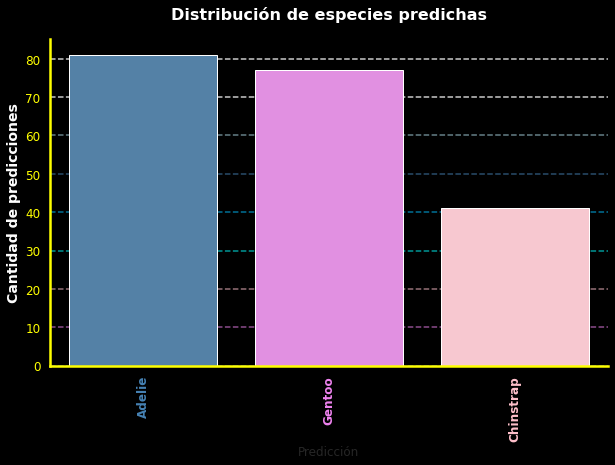

In [91]:
# Resuelve aquí el ejericio 5.4

predicciones_cinco = cinco_random_forest.predict(cinco_x_train)
print("Primeras predicciones de 'species':")
print(predicciones_cinco[:15])

# Gráfico de la distribución de especies predichas por el modelo Random Forest

resultados_cinco = pd.DataFrame({
    "Predicción": predicciones_cinco,
    "Real":       cinco_y_train.values
})

colores = ['steelblue', 'violet', 'pink', 'cyan', 'deepskyblue', 'steelblue', 'lightblue']

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

sns.countplot(
    x="Predicción",
    data=resultados_cinco,
    palette=colores,
    ax=ax
)

plt.xticks(rotation=90)

for i, label in enumerate(ax.get_xticklabels()):
    label.set_color(colores[i % len(colores)])  
    label.set_fontsize(12)
    label.set_weight('bold')

for tick in ax.get_yticklabels():
    tick.set_color('yellow')
    tick.set_fontsize(12)

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('yellow')   
ax.spines['bottom'].set_color('yellow') 

ax.grid(True, axis='y', linestyle='--', linewidth=1.5)
gridlines = ax.get_ygridlines()
for i, line in enumerate(gridlines):
    if i < len(colores): 
        line.set_color(colores[i % len(colores)])  
        line.set_alpha(0.6)

plt.ylabel('Cantidad de predicciones', fontsize=14, color='white', weight='bold')
plt.title('Distribución de especies predichas', 
          fontsize=16, color='white', weight='bold', pad=20)

plt.show()

### Ejercicio 6

#### Ejercicio 6.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [18]:

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
df_seis = pd.read_csv(url, header=None)
df_seis.columns = [
   "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
# df = df.drop("Sex", axis=1)

# Resuelve aqui el ejercicio 6.1

print("Resumen estadístico de los datos numéricos del dataset (Transposición de columnas y filas):")

df_seis.describe().T

Resumen estadístico de los datos numéricos del dataset (Transposición de columnas y filas):


,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


#### Ejercicio 6.2
Separa el conjunto de datos en variables 'x' e 'y', donde la 'y' corresponde a la variable objetivo 'Sex'.

In [19]:
# Resuelve aqui el ejercicio 6.2

seis_x = df_seis.drop("Sex", axis=1)
seis_y = df_seis["Sex"]

# Comprobación de la variable objetivo "Sex"

print(f"Columnas de la variable 'x':\n{seis_x.head()}")
print("------------------------------------------------------------------------------------------------\n")
print(f"Columnas de la variable 'y':\n{seis_y.head()}")

Columnas de la variable 'x':
   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  Shell weight  Rings
0   0.455     0.365   0.095        0.5140          0.2245          0.1010         0.150     15
1   0.350     0.265   0.090        0.2255          0.0995          0.0485         0.070      7
2   0.530     0.420   0.135        0.6770          0.2565          0.1415         0.210      9
3   0.440     0.365   0.125        0.5160          0.2155          0.1140         0.155     10
4   0.330     0.255   0.080        0.2050          0.0895          0.0395         0.055      7
------------------------------------------------------------------------------------------------

Columnas de la variable 'y':
0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object


#### Ejercicio 6.3
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. 

In [20]:
# Resuelve aquí el ejercicio 6.3

# Separación del dataset provisto en conjunto de entrenamiento y de test

seis_x_train, seis_x_test, seis_y_train, seis_y_test = train_test_split(seis_x, seis_y, test_size=0.4, random_state=42)

# Comprobación del tamaño del conjunto de la variable "x"

print(f"Tamaño del conjunto de entrenamiento (x_train): {seis_x_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba (x_test): {seis_x_test.shape[0]} filas")
print("------------------------------------------------------------")

# Comprobación del tamaño del conjunto de la variable "y"

print(f"Tamaño del conjunto de entrenamiento (y_train): {seis_y_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba (y_test): {seis_y_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento (x_train): 2506 filas
Tamaño del conjunto de prueba (x_test): 1671 filas
------------------------------------------------------------
Tamaño del conjunto de entrenamiento (y_train): 2506 filas
Tamaño del conjunto de prueba (y_test): 1671 filas


#### Ejercicio 6.4
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior.

In [93]:
# Resuelve aquí el ejercicio 6.4 (La parte del enunciado "Utiliza el valor 3 para el parámetro 'n_neighbors'", es un error)

# Crear y entrenar el modelo con los datos de entrenamiento

seis_lrm = LogisticRegression(max_iter=1000)
seis_lrm.fit(seis_x_train, seis_y_train)

# 3) Mostrar resultados básicos de precisión sobre entrenamiento y prueba

print("Modelo de regresión logística entrenado correctamente.")
print("-----------------------------------------------------")
print(f"Precisión en entrenamiento: {seis_lrm.score(seis_x_train, seis_y_train):.4f}")
print(f"Precisión en prueba: {seis_lrm.score(seis_x_test, seis_y_test):.4f}")

Modelo de regresión logística entrenado correctamente.
-----------------------------------------------------
Precisión en entrenamiento: 0.5587
Precisión en prueba: 0.5625


#### Ejercicio 6.5
Muestra la matriz de confusión resultante para la salida del ejercicio anterior

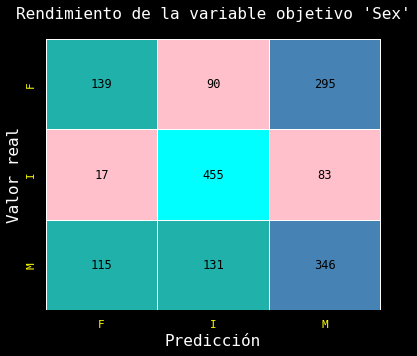

In [130]:
# Resuelve aquí el ejercicio 6.5

predicciones_seis = seis_lrm.predict(seis_x_test)

# Matriz de Confusión. Regresión Logística (valores reales vs. predicción de la variable objetivo 'Sex')

matriz_seis = confusion_matrix(seis_y_test, predicciones_seis, labels=seis_lrm.classes_)

cm_df = pd.DataFrame(
    matriz_seis,
    index=seis_lrm.classes_,
    columns=seis_lrm.classes_
)

plt.rcParams['font.family'] = 'DejaVu Sans Mono'
mar_palette = ["pink", "lightseagreen", "orange", "steelblue", "cyan"]
sns.set_palette(mar_palette)

fig, ax = plt.subplots(figsize=(6, 5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap= mar_palette,
    cbar=False,
    linewidths=0.5,
    linecolor='white',
    ax=ax,
    annot_kws={'color': 'black', 'fontsize': 12}
)

ax.set_xlabel("Predicción", fontsize=16, color='white')
ax.set_ylabel("Valor real", fontsize=16, color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('yellow')
ax.spines['bottom'].set_color('yellow')

ax.tick_params(axis='x', colors='yellow')
ax.tick_params(axis='y', colors='yellow')

ax.set_title("Rendimiento de la variable objetivo 'Sex'", 
             fontsize=16, color='white', pad=20)

plt.show()